In [63]:
import numpy as np
import matplotlib.pyplot as plt 
import pywt
from pywt import wavedec
from matplotlib import style
from skimage.restoration import denoise_wavelet
import pandas as pd

# Question1:


Que1: Generate a real chirp signal. Compute the subband decomposition of this
signal upto three levels and plot the approximate and detail components.

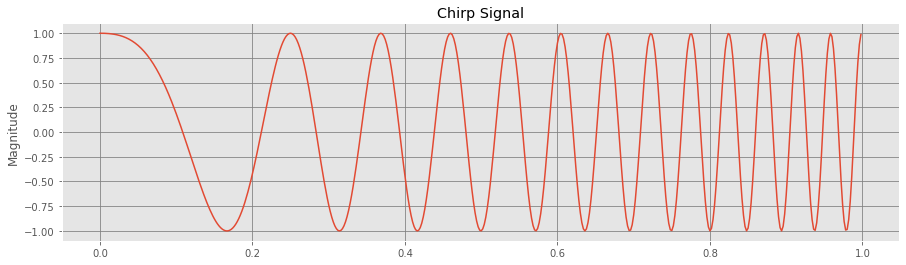

In [55]:
# Defining and plotting the chirp signal::

def mychirp(t,f0,t1,f1,phase):
    t0=t[1]
    T=t1-t0
    k=(f1-f0)/T
    x=np.cos(2*np.pi*((((k*t)/2)+f0))*t + phase)
    return x


fs=500
t=np.arange(0,1,1/fs)
f0=1                # starting frequency of the chirp
f1=fs/20            #frequency of the chirp at t1=1 second
x = mychirp(t,f0,1,f1,0) 
fig = plt.figure(1,figsize=(15,4))
plt.plot(t,x)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Chirp Signal")
plt.show()

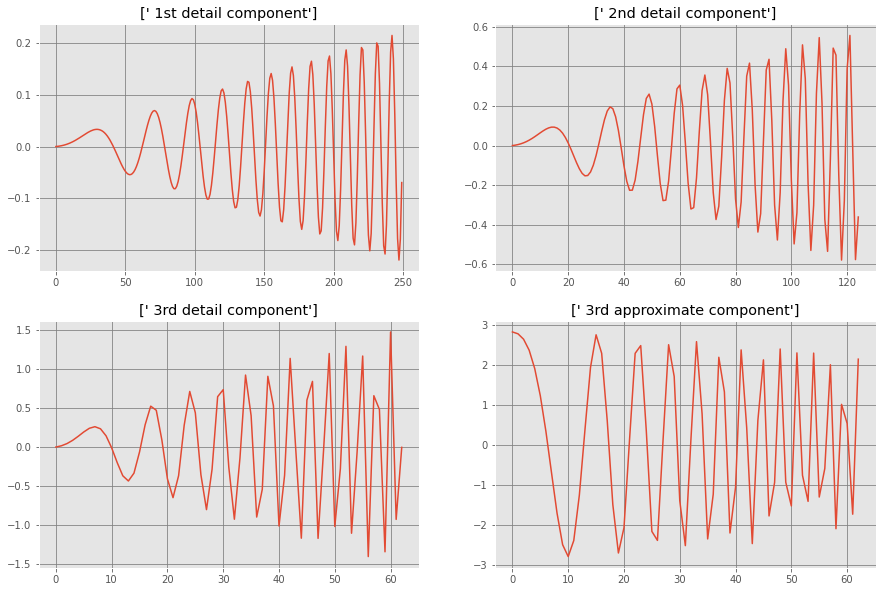

In [56]:
# Finding the decomposition of the chirp signal::

coeff = pywt.wavedec(x,'db1', level = 3, mode = 'symmetric')
ca3,cd3,cd2,cd1 = coeff
fig = plt.figure(1,figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(cd1)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 1st detail component'])

plt.subplot(2,2,2)
plt.plot(cd2)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 2nd detail component'])

plt.subplot(2,2,3)
plt.plot(cd3)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 3rd detail component'])

plt.subplot(2,2,4)
plt.plot(ca3)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 3rd approximate component'])
plt.show()

# Question 2:

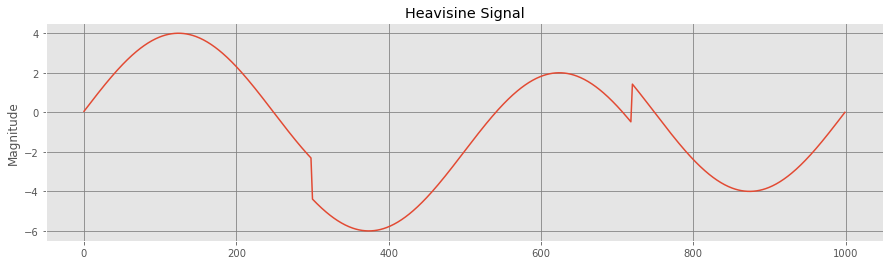

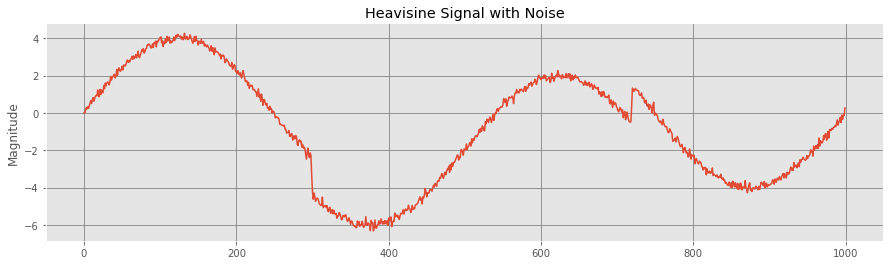

In [58]:
#Plotting the heavisine signal:

y =  pywt.data.demo_signal(name='HeaviSine', n=1000)
fig = plt.figure(1,figsize=(15,4))
plt.plot(y)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Heavisine Signal")


# Adding noise to Heavisine signal:

x_watts=x**2
x_avg_watts = np.mean(x_watts)
x_avg_db = 10 * np.log10(x_avg_watts)
target_snr_db = 15
noise_avg_db = x_avg_db - target_snr_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
noise = np.random.normal(0, np.sqrt(noise_avg_watts), len(y))

noisy_signal = y + noise
fig = plt.figure(2,figsize=(15,4))
plt.plot(noisy_signal)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Heavisine Signal with Noise")
plt.show()


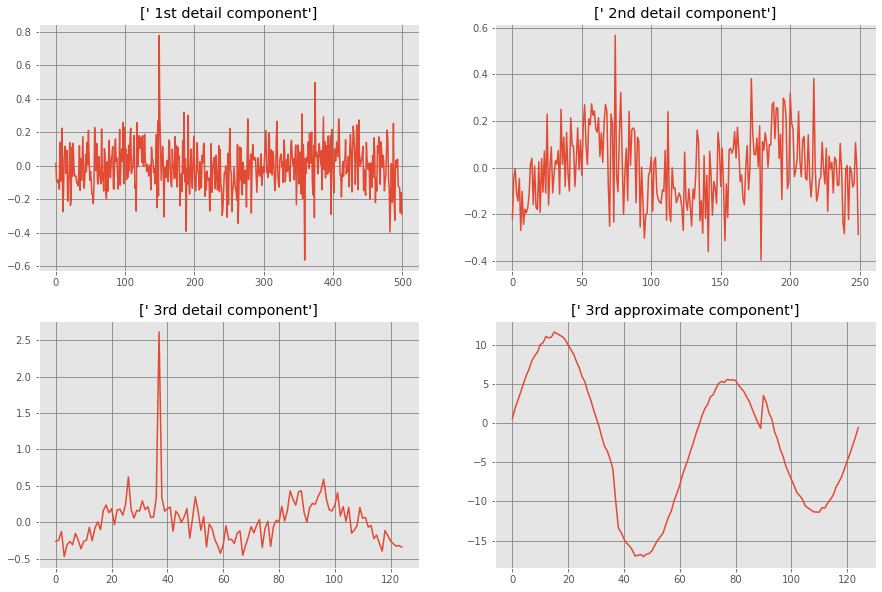

In [59]:
# Wavelet Decomposition:

coeff = pywt.wavedec(noisy_signal,'db1', level = 3, mode = 'symmetric')
ca3,cd3,cd2,cd1 = coeff
fig = plt.figure(1,figsize=(15,10))
plt.subplot(2,2,1)
plt.plot(cd1)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 1st detail component'])

plt.subplot(2,2,2)
plt.plot(cd2)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 2nd detail component'])

plt.subplot(2,2,3)
plt.plot(cd3)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 3rd detail component'])

plt.subplot(2,2,4)
plt.plot(ca3)
style.use("ggplot")
plt.grid(color="gray")
plt.title([' 3rd approximate component'])
plt.show()

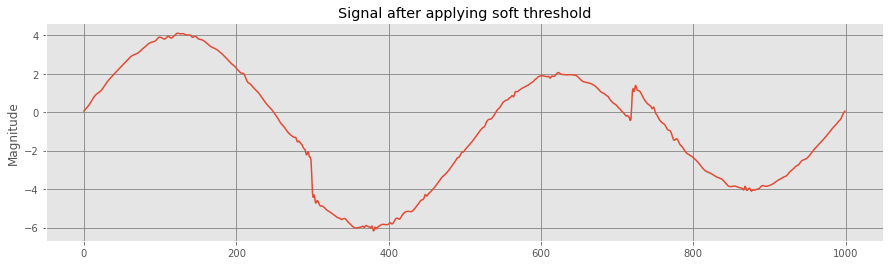

In [60]:
# Applying soft thresholding for removing the noise:
 
denoise = denoise_wavelet(noisy_signal, method = 'BayesShrink', mode ='soft',wavelet_levels =3,wavelet='sym8',rescale_sigma ='True')

fig = plt.figure(1,figsize=(15,4))
plt.plot(denoise)
style.use("ggplot")
plt.grid(color="gray")
plt.ylabel("Magnitude")
plt.title("Signal after applying soft threshold")
plt.show()

#  Question 3:

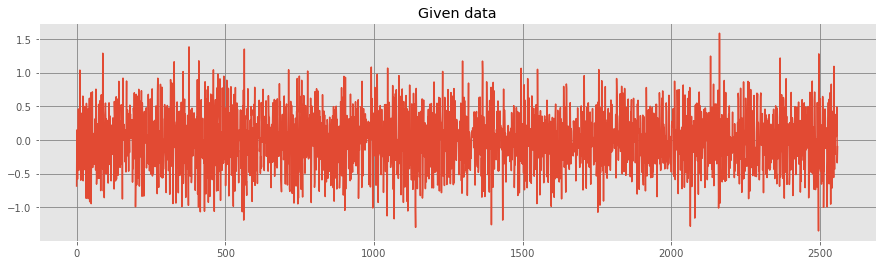

In [72]:
# Reading the dataset::

column_name=['A','B','C','D','E','F']
data=pd.read_csv('acc_00003.csv',names=column_name)
Data=data['F']
fig = plt.figure(1,figsize=(15,4))
plt.plot(Data)
style.use("ggplot")
plt.grid(color="gray")
plt.title("Given data")
plt.show()


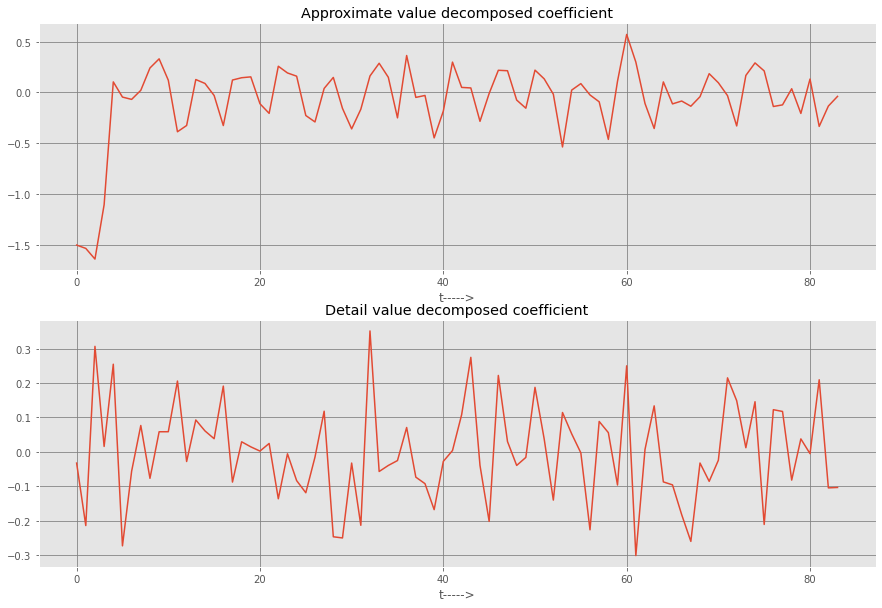

In [77]:


approx_coeff= pywt.downcoef('a',Data, 'db3', mode='sym', level=5)
detail_coeff = pywt.downcoef('d',Data, 'db3', mode='sym', level=5)

decomposed_coeff= [approx_coeff,detail_coeff]
title_name= ["Approximate value","Detail value"]
fig, axs = plt.subplots(2,1, figsize=(15,10))
c =1
for k in range(len(decomposed_coeff)):
    fig.set_facecolor("white")
    plt.subplot(2,1,c)
    plt.plot(decomposed_coeff[k])
    style.use("ggplot")
    plt.grid(color="gray")
    plt.title(str(title_name[k])+" decomposed coefficient")
    plt.xlabel("t----->")
    c =c+1 

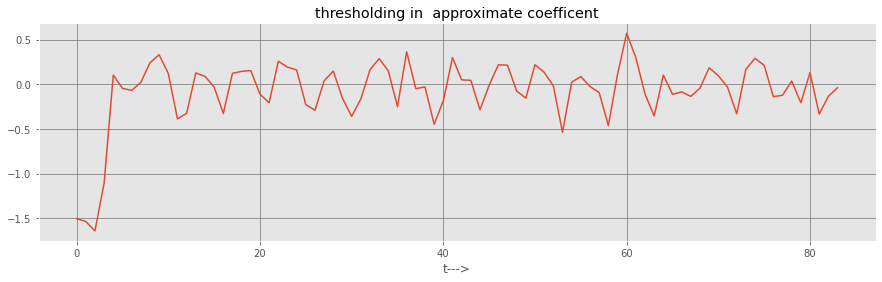

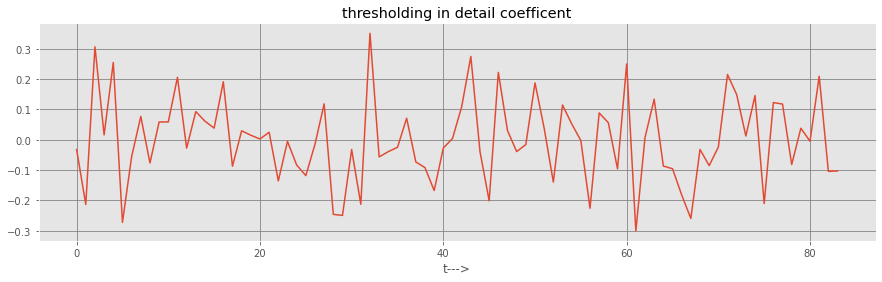

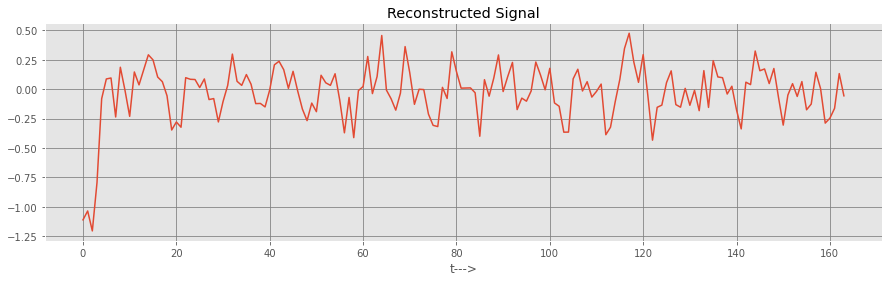

In [81]:
# Thresholding::

sigma_Approx = (np.median(approx_coeff)/0.6745)

threshold_Approx = sigma_Approx*(np.sqrt(2*np.log(len(approx_coeff))))

approxi_thres = pywt.threshold(approx_coeff,threshold_Approx,mode= 'hard')
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(approxi_thres)
style.use("ggplot")
plt.grid(color="gray")
plt.title("thresholding in  approximate coefficent")
plt.xlabel('t--->')


sigma_Detail = (np.median(detail_coeff)/0.6745)
threshold_Detail =sigma_Detail*(np.sqrt(2*np.log(len(detail_coeff))))
detail_thres = pywt.threshold(detail_coeff,threshold_Detail,mode="hard")
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(detail_thres)
style.use("ggplot")
plt.grid(color="gray")
plt.title("thresholding in detail coefficent")
plt.xlabel('t--->')
plt.show()

# Reconstruction of signal::

reconstruct_signal= pywt.idwt(approxi_thres,detail_thres, wavelet='db3', mode='symmetric', axis = -1)
fig =plt.figure(figsize=(15,4))
fig.set_facecolor("white")
plt.plot(reconstruct_signal)
style.use("ggplot")
plt.grid(color="gray")
plt.title("Reconstructed Signal")
plt.xlabel('t--->')
plt.show()

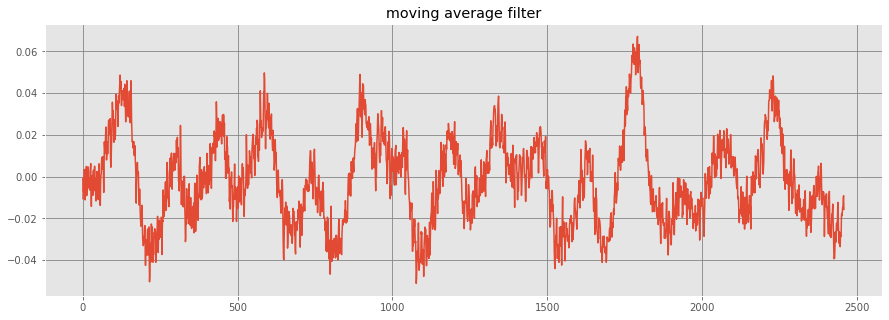

In [82]:
# Moving average filter::

def MovingAverage(signal,p):
  ma=list()
  for i in range(p,len(signal)):
    avg=0
    for j in range(p):
      avg+=(signal[i-j-1])/p
    ma.append(avg)
  return np.array(ma)


MA=MovingAverage(Data,100)
plt.figure(figsize=(15,5))
plt.plot(MA)
style.use("ggplot")
plt.grid(color="gray")
plt.title("moving average filter")
plt.show()